<a href="https://colab.research.google.com/github/EddyGiusepe/Sistema_RECOMENDACION_Netflix/blob/main/Netflix_RECOMMENDATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>**Sistema de recomendação de filmes na Netflix com Python**</h2> 


**Cientista de Dados Jr.:**  Dr.Eddy Giusepe Chirinos Isidro

## 1. Importamos as nossas bibliotecas 

In [39]:
import numpy as np # Algebra linear
import pandas as pd # Para processar nossos Dados
import matplotlib.pyplot as plt
%matplotlib inline

import time
import seaborn as sns
import re
import math

import plotly.express as px

## 2. Carregamos nossos Dados 

In [2]:
df = pd.read_csv("/content/drive/MyDrive/4_teoria_IA_ML_DL_Eddy/Sistema_recomendacion_Netflix/netflix_titles.csv")

In [3]:
df.shape

(7787, 12)

In [4]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6002,s6003,Movie,Team Foxcatcher,Jon Greenhalgh,NaN,United States,"April 29, 2016",2016,TV-MA,91 min,"Documentaries, Sports Movies","With never-before seen home video, this film r..."
7448,s7449,Movie,W. Kamau Bell: Private School Negro,Shannon Hartman,W. Kamau Bell,United States,"June 26, 2018",2018,TV-MA,66 min,Stand-Up Comedy,Comedian W. Kamau Bell muses on parenting in t...
6553,s6554,TV Show,The Last Czars,NaN,"Robert Jack, Susanna Herbert, Ben Cartwright, ...",United States,"July 3, 2019",2019,TV-MA,1 Season,"Docuseries, TV Dramas",When social upheaval sweeps Russia in the earl...
2316,s2317,Movie,Functional Fitness,Bob Rose,NaN,United States,"January 1, 2018",2016,TV-MA,106 min,Documentaries,"This documentary explores the challenging, tra..."
6448,s6449,Movie,The Heretics,Chad Archibald,"Nina Kiri, Ry Barrett, Jorja Cadence, Will Kin...",Canada,"September 4, 2019",2017,TV-MA,88 min,Horror Movies,A withdrawn young woman hunted by a malicious ...
6556,s6557,Movie,The Last Days of Chez Nous,Gillian Armstrong,"Lisa Harrow, Bruno Ganz, Kerry Fox, Miranda Ot...",Australia,"November 1, 2016",1992,R,93 min,"Classic Movies, Dramas",Successful writer Beth's tepid marriage and ho...
3696,s3697,Movie,Locke,Steven Knight,"Tom Hardy, Olivia Colman, Ruth Wilson, Andrew ...","United Kingdom, United States","July 15, 2018",2013,R,85 min,"Dramas, Independent Movies","Over the space of 90 minutes, Ivan Locke's lif..."
5915,s5916,Movie,Sur Sapata,Mangesh Kanthale,"Upendra Limaye, Govind Namdeo, Sanjay Jadhav, ...",India,"May 1, 2019",2019,TV-14,140 min,"Comedies, Dramas, International Movies",A group of small-town students goes for glory ...
5814,s5815,Movie,Steve Jobs,Danny Boyle,"Michael Fassbender, Kate Winslet, Seth Rogen, ...","United Kingdom, United States","January 16, 2020",2015,R,122 min,Dramas,By keying in on three crucial points in his ca...
3796,s3797,Movie,Loving You,Johnnie To,"Lau Ching Wan, Carman Lee, Tsung-Hua To, Chung...",Hong Kong,"August 16, 2018",1995,TV-14,79 min,"Dramas, International Movies","Struggling in a loveless marriage, a hard-drin..."


## 3. Análise e limpeza de nossos Dados

In [5]:
# Aqui só a coluna "release_year" é do tipo inteiro

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
# Aqui ver a quantidade total de valores MISSING
# As colunas: director, cast, country, date_added e rating apresentam valores Missing. 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
# Outra maneira de visualizar os valores MISSING é:

df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

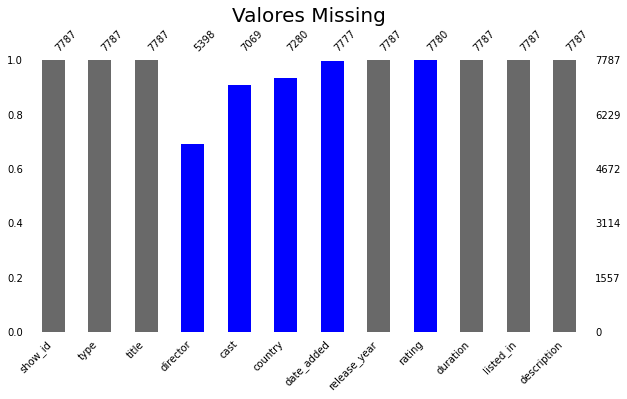

In [8]:
# Aqui vamos a usar o seguinte método para visualizar os Dados MISSING
# As colunas "director" e "cast" podem ser eliminadas, já que não podem ser completadas aleatoriamente (obvio: valores muitos versáteis)
# Para um número mínimo de valores Missing nas colunas "country", "date_added" e "rating", podemos completar eles usando a MODA ou a MÉDIA.

import missingno 

color = ["dimgrey","dimgrey","dimgrey","blue","blue","blue","blue","dimgrey","blue","dimgrey","dimgrey","dimgrey"]
missingno.bar(df, fontsize=10, color=color, figsize=(10, 5))
plt.title("Valores Missing", fontsize=20)
plt.show()


In [9]:
# Ideia na coluna "country"

df["country"].value_counts()

United States                         2555
India                                  923
United Kingdom                         397
Japan                                  226
South Korea                            183
                                      ... 
United Kingdom, Israel, Russia           1
Ireland, South Africa                    1
United States, Senegal                   1
South Africa, China, United States       1
United Kingdom, Canada, Japan            1
Name: country, Length: 681, dtype: int64

In [10]:
# Facilmente podemos observar que o valor mais comum é: "United States". 
# É a moda!

df["country"].mode()[0]

'United States'

In [11]:
# Ideia na coluna "rating"

df["rating"].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [12]:
df["rating"].mode()[0]

'TV-MA'

In [13]:
# Aqui vamos a tratar os campos mencioandos acima

df["country"] = df["country"].fillna(df["country"].mode()[0])
df["date_added"] = df["date_added"].fillna(df["date_added"].mode()[0]) 
df["rating"] = df["rating"].fillna(df["rating"].mode()[0])


In [14]:
# Aqui, novamente, visualizamos a quantidade total de valores MISSING 

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
# A seguir ELIMINAMOS as LINHAS em: "cast" e "director" (os motivos foi explicado acima)

df = df.dropna(how="any", subset=["cast", "director"])


In [16]:
df.shape

(4979, 12)

In [17]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,"Dramas, Thrillers",A farmer pens a confession admitting to his wi...


In [18]:
# Mais uma vez visualizamos nossos Dados
# Podemos ve que já não teremos valores missing

df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df.shape

(4979, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4979 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4979 non-null   object
 1   type          4979 non-null   object
 2   title         4979 non-null   object
 3   director      4979 non-null   object
 4   cast          4979 non-null   object
 5   country       4979 non-null   object
 6   date_added    4979 non-null   object
 7   release_year  4979 non-null   int64 
 8   rating        4979 non-null   object
 9   duration      4979 non-null   object
 10  listed_in     4979 non-null   object
 11  description   4979 non-null   object
dtypes: int64(1), object(11)
memory usage: 505.7+ KB


In [21]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [22]:
# A seguir adicionamos algumas "novas colunas" (na verdade trocamos de nomes)

df = df.rename(columns={"listed_in":"Genero"})


In [23]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [24]:
df["Genero"] = df["Genero"].apply(lambda x: x.split(",")[0]) 

In [25]:
# Ao aplicar a função anterior, observaremos que só pegamos a primeira frase da coluna "Gênero"

df["Genero"].head(4)

1                Dramas
2         Horror Movies
3    Action & Adventure
4                Dramas
Name: Genero, dtype: object

In [26]:
# Nesta coluna só teremos os anos do filme, série, etc 

df["year_add"] = df['date_added'].apply(lambda x: x.split(" ")[2]) # aqui pode substituir também: 2 --> -1

In [27]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018


In [28]:
# Vamos adicionar os meses também, assim:

df["month_add"] = df['date_added'].apply(lambda x: x.split(" ")[0])
df["month_add"].head()

1    December
2    December
3    November
4     January
5        July
Name: month_add, dtype: object

In [29]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December


In [30]:
# Para país, só pegamos o principal (main). Ou seja a primeira posição

df["country_main"] = df['country'].apply(lambda x: x.split(",")[0])
df["country_main"].head(5)

1           Mexico
2        Singapore
3    United States
4    United States
5           Turkey
Name: country_main, dtype: object

In [33]:
# A seguir vamos a contabilizar os filmes e as séries de programação.
# Observamos a contagem e a porcentagem

count = df["type"].value_counts()
percent = 100*df['type'].value_counts(normalize=True)
pd.DataFrame({"count":count, "percent":percent.round(1)})

# NOTA: Aqui observamos que a maioria do conteúdo da Netflix representa o 97.1% e apenas o 2.9% são TV Show. 

,count,percent
Movie,4834,97.1
TV Show,145,2.9


In [34]:
# Como podemos observar aqui: TV-MA, TV-14 e R ocupam os três primeiros lugares em preferência 

count = df["rating"].value_counts()
percent = 100*df['rating'].value_counts(normalize=True)
pd.DataFrame({"count":count, "percent":percent.round(1)})

,count,percent
TV-MA,1728,34.7
TV-14,1183,23.8
R,656,13.2
TV-PG,426,8.6
PG-13,378,7.6
PG,241,4.8
TV-Y,90,1.8
TV-G,85,1.7
TV-Y7,82,1.6
NR,62,1.2


In [35]:
# A seguir criamos dois DataFrames: um para a coleção de filmes e outro para a coleção de programas de TV

movie_df = df[df["type"]== "Movie"]
tv_df = df[df["type"]== "TV Show"]


In [36]:
# Visualizamos o DataFrame

movie_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add,country_main
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December,Mexico
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December,Singapore
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November,United States
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,United States
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",2020,June,Egypt
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...,2019,November,United States
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,Horror Movies,"When a doctor goes missing, his psychiatrist w...",2019,April,India
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,Horror Movies,An architect and his wife move into a castle t...,2017,December,India
10,s11,Movie,1922,Zak Hilditch,"Thomas Jane, Molly Parker, Dylan Schmid, Kaitl...",United States,"October 20, 2017",2017,TV-MA,103 min,Dramas,A farmer pens a confession admitting to his wi...,2017,October,United States
13,s14,Movie,"2,215",Nottapon Boonprakob,Artiwara Kongmalai,Thailand,"March 1, 2019",2018,TV-MA,89 min,Documentaries,This intimate documentary follows rock star Ar...,2019,March,Thailand


In [37]:
# Imprimimos o DataFrame

tv_df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,Genero,description,year_add,month_add,country_main
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,International TV Shows,A genetics professor experiments with a treatm...,2017,July,Turkey
132,s133,TV Show,7 (Seven),Nizar Shafi,"Rahman, Havish, Regina Cassandra, Nandita Swet...",India,"July 30, 2019",2019,TV-14,1 Season,TV Shows,Multiple women report their husbands as missin...,2019,July,India
218,s219,TV Show,A Queen Is Born,Carla Barros,"Gloria Groove, Alexia Twister",Brazil,"November 11, 2020",2020,TV-14,1 Season,International TV Shows,Gloria Groove and Alexia Twister make drag dre...,2020,November,Brazil
260,s261,TV Show,A.I.C.O.,Kazuya Murata,"Haruka Shiraishi, Yusuke Kobayashi, Makoto Fur...",Japan,"March 9, 2018",2018,TV-14,1 Season,Anime Series,Everything Aiko knew was a lie. Now she's join...,2018,March,Japan
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada","July 1, 2020",2019,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020,July,United States
284,s285,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,International TV Shows,"Led by a trio of Korean celebs, a multinationa...","4,",,South Korea
322,s323,TV Show,Afronta! Facing It!,Juliana Vicente,"Loo Nascimento, Ingrid Silva, Rincon Sapiência...",Brazil,"October 31, 2020",2017,TV-PG,1 Season,Docuseries,This docuseries spotlights Afro-Brazilian thin...,2020,October,Brazil
337,s338,TV Show,Age of Rebellion,Peter Ho,"Peter Ho, Jeanine Yang, Tammy Chen, Jason Tsou...",Taiwan,"September 1, 2018",2018,TV-MA,1 Season,Crime TV Shows,"At their high school, a group of unruly teens ...",2018,September,Taiwan
365,s366,TV Show,Akulah Balqis,Pali Yahya,"Puteri Balqis, Aeril Zafrel, Nabila Huda, Nazi...",United States,"November 3, 2017",2015,TV-14,1 Season,International TV Shows,A little girl must enter an orphanage after he...,2017,November,United States
426,s427,TV Show,Almost Happy,Hernán Guerschuny,"Sebastián Wainraich, Natalie Pérez, Santiago K...",Argentina,"May 2, 2020",2020,TV-MA,1 Season,International TV Shows,"Sebastián is a radio show host of modest fame,...",2020,May,Argentina


## 3. Análise e exploração de nossos Dados 

### <font color="orange">Movie Vs TV Show</font>

In [41]:
fig = px.histogram(df,
                   x = "type",
                   template = "plotly_dark",
                   color_discrete_sequence = ["forestgreen", "darkorange", "gold", "deeppink"],
                   title = "Tipo de Programas")
fig.update_layout(bargap = 0.1)
fig.show()


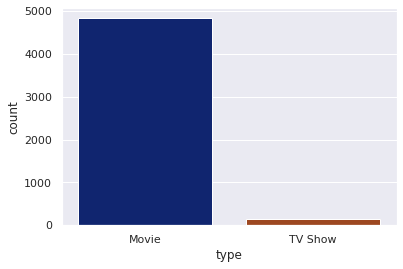

In [43]:
# Também podemos graficar o anterior usando SEABORN

sns.set(style = "darkgrid")
sns.countplot(x = "type", data = df, palette = "dark")

### <font color="orange">Analisando o Rating de Movies e TV Shows</font>

No seguinte gráfico podemos extrair os seguintes Insights:

* A maior classificação é para TV-MA. Está classificação é fundamentalmente para um público com maior maturidade.

* A segunda classificação, significa que o conteúdo puede ser inapropriado para crianças menores de $14$ anos de Idade.

* A seguinte classificação, R. Esta classificação é um filme que não é adequado para menores de $17$ anos de Idade.

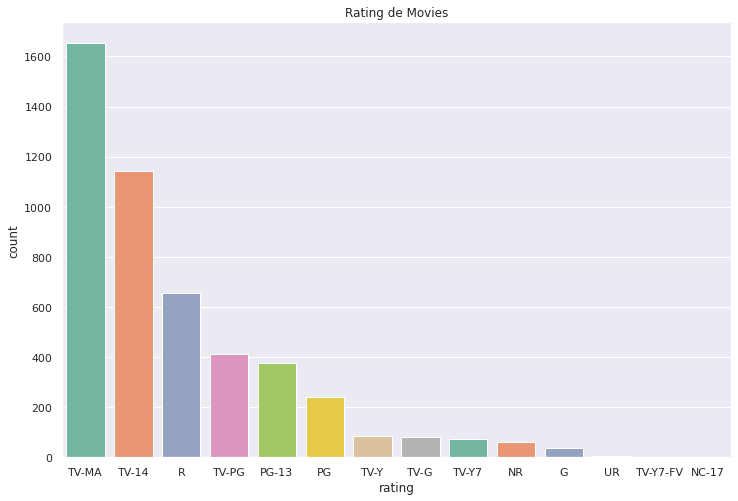

In [48]:
# Movies Rating

plt.figure(figsize=(12, 8))
sns.set(style = "darkgrid")
sns.countplot(x = "rating", data = movie_df, palette = "Set2", order = movie_df["rating"].value_counts().index[0:15])
plt.title("Rating de Movies");


No seguinte gráfico podemos extrair os seguintes Insights:

* A maioria dos programas de televisão tem classificação TV-14, o que significa que o conteúdo pode ser inapropriado para crianças menores de $14$ anos de Idade.

*  Analisar com mais detalhes...... !

* Os programas de televisão em menor quantidade tem classificações "R".



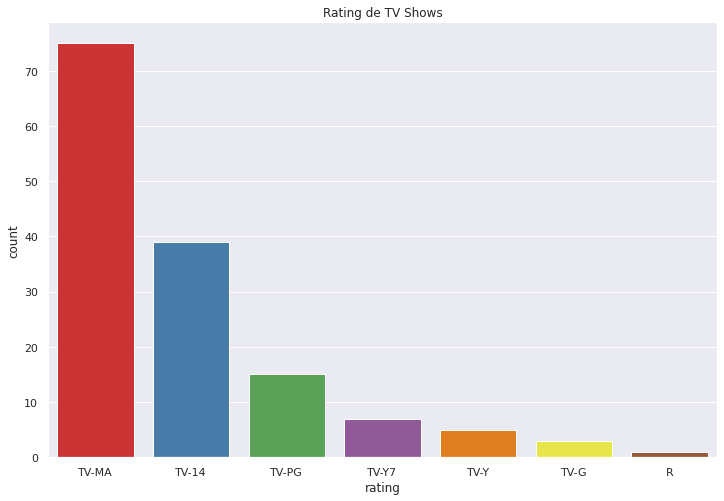

In [49]:
# TV Shows Rating

plt.figure(figsize=(12, 8))
sns.set(style = "darkgrid")
sns.countplot(x = "rating", data = tv_df, palette = "Set1", order = tv_df["rating"].value_counts().index[0:15])
plt.title("Rating de TV Shows");

### <font color="orange">Análise do conteúdo por ano</font>

No seguinte gráfico podemos extrair os seguintes Insights:

* No gráfico observamos que a Netflix produziu maior conteúdo no ano $2017$.

* A Netflix teve um bom crescimento a partir do ano $2015$.

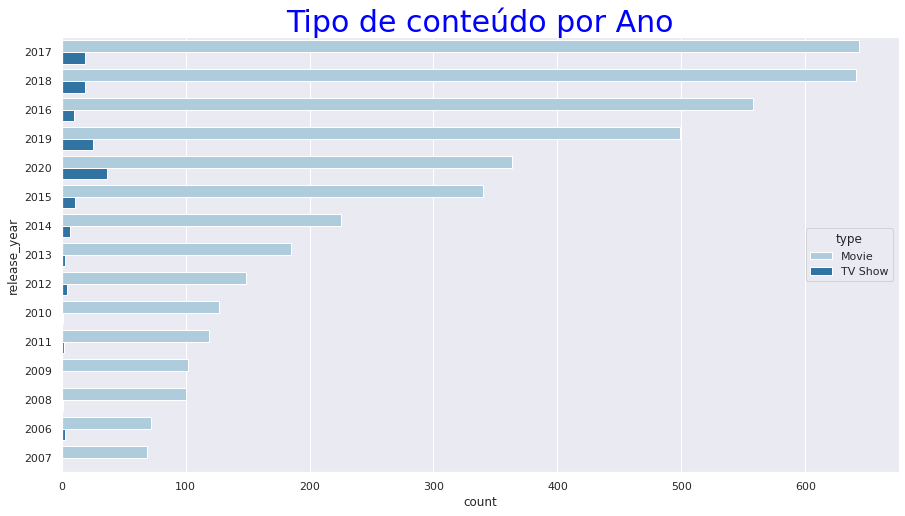

In [55]:
plt.figure(figsize=(15, 8))
sns.set(style = "darkgrid")
sns.countplot(y = "release_year", data = df, palette = "Paired", order = df["release_year"].value_counts().index[0:15], hue = df["type"])
plt.title("Tipo de conteúdo por Ano", fontsize = 30, color = "blue");

### <font color="orange">Análise de duração de Movies</font>


In [56]:
movie_df["duration"] = movie_df["duration"].str.replace("min", "")
movie_df["duration"] = movie_df["duration"].astype(str).astype(int)
movie_df["duration"] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7778     88
7780     94
7781     88
7782     99
7783    111
Name: duration, Length: 4834, dtype: int64